# Practical Machine Learning for Physicists
## Week 4 Exercise - Part 1


### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


_________________________________________

Import what's needed and set-up figure display conditions.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.9.2


Load and store the MNIST dataset, also rescaling it to mormalize the values.

In [24]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#f_mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Rescaling both image sets so that values are relative to 1
train_images=train_images/255.0
test_images=test_images/255.0

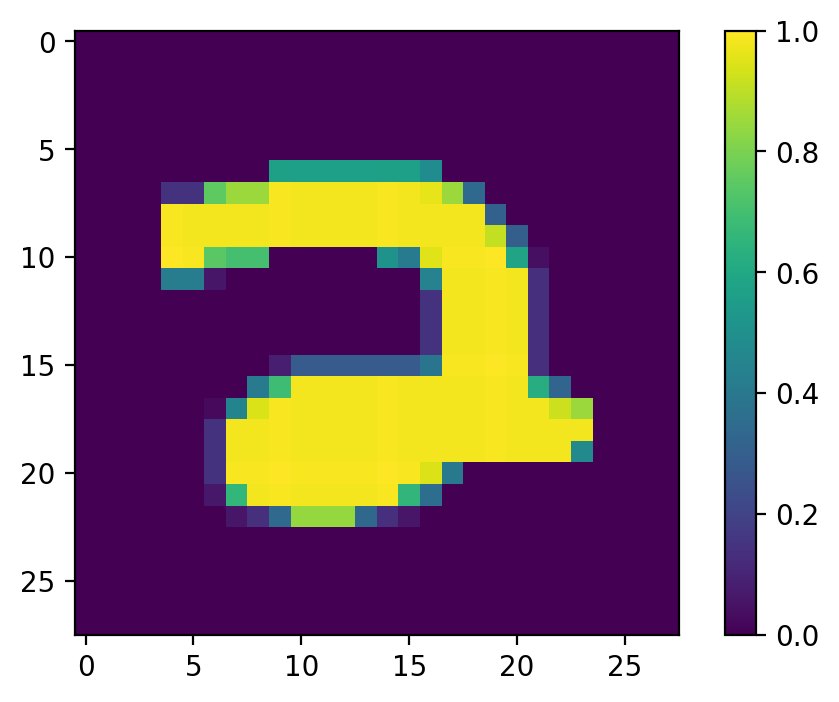

In [25]:
plt.imshow(train_images[570])  # Displays an image from the dataset.
plt.colorbar()                 #Generates a colorbar for the image, telling us what values the colours represent.

# Task 1: A Single Convolutional Layer
Let's now try to setup a model with hidden layers, including a single convolutional layer.

In [26]:
model = keras.models.Sequential()                                                      #load a keras-model in 'model'
model.add(keras.layers.Conv2D(5, (3,3), activation='relu', input_shape=(28, 28, 1)))   #Add a convolution layer which takes an input of a single colour 28x28 image. Twenty eight of 3x3 kernels are applied to the image.
model.add(keras.layers.MaxPooling2D((2, 2)))                                           #Add a pooling layer (2x2 dimensions) that downsamples from 28x28 to 14x14. Maxpooling selects the brighter spots in the image.

model.summary()                                                                        #Generate a summary of the parameters and output shapes of the layers in the model.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


...adding some hidden fully-connected layers.

In [27]:
model.add(keras.layers.Flatten(input_shape=(28,28)))                                     #Adding a flattening layer that converts the 28x28 image into a string of 784x1.
model.add(keras.layers.Dense(128, activation='relu'))                                    #Adding a fully connected hidden layer with 128 neurons and relu activation.
model.add(keras.layers.Dense(10))                                                        #Adding an output layer that seperates the dataset into 10 classes of objects (corresponding to the 10 digits).

model.summary()                                                                          #Generate a summary of the parameters and output shapes of the layers in the model.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 845)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               108288    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 109,628
Trainable params: 109,628
Non-trainable params: 0
________________________________________________

In [28]:
model.compile(optimizer='adam',                                                         # Compile the model with 'adam' optimizer'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # Added in code to output the loss and accuracy values when asked for it.
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,                              # Teach the model via the training images and labels provided, repeating this for 5 epochs (rounds of teaching and testing).
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2253 - accuracy: 0.9341 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0764 - accuracy: 0.9770 - val_loss: 0.0649 - val_accuracy: 0.9796
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0556 - val_accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0450 - val_accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0480 - val_accuracy: 0.9843


**I used 5 epochs as it netted a pretty good accuracy level while also not making the code long to run.**

In [29]:
print(np.shape(test_images))                                                            # Print the shape of the 'test_images' data set. Out outs as (number of images, x-pixels, y-pixels)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)              # Store and print the final accuracy and loss values for test.

print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 2s - loss: 0.0480 - accuracy: 0.9843 - 2s/epoch - 6ms/step

Test accuracy: 0.9843000173568726


**In this task, I maximized the accuracy by varying the number of neurons in the hidden layer, the number of kernels applied to the image in the convolution layer and the size of the kernels in the convolution layer. Although I originally used 28 kernels in the conv layer, I later reduced it to 5 after seeing minimal differences in accuracy while seeing a marked improvement in time taken to run the code. In the interest of maintaining a reasonably complex NN, I kept the kernel size to 3x3 instead of increasing it.**

_______________________________________________________

# Task 2: Multiple Convolutional Layers

Let's now try to setup a model with multiple convolutional layers.

The activation will be kept as 'relu', as it seems to generate sharper guesses as comapred to the 'smoother' guesses of sigmoid, which can be seen by the graphs they symbolize.

In [30]:
model = keras.models.Sequential()                                                                  #load a keras-model in 'model'
model.add(keras.layers.Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 1)))              #Add a convolution layer which takes an input of a single colour 28x28 image. 5 of 3x3 kernels are applied to the image.
model.add(keras.layers.MaxPooling2D((2, 2)))                                                       #Add a pooling layer (2x2 dimensions) that downsamples from 28x28 to 14x14.
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))                                      #Add a convolution layer. 10 of 3x3 kernels are applied to the image.
model.add(keras.layers.MaxPooling2D((2, 2)))                                                       #Add a pooling layer (2x2 dimensions) that downsamples from 28x28 to 14x14.
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))                                      #Add a convolution layer. 10 of 3x3 kernels are applied to the image.

model.add(keras.layers.Flatten(input_shape=(28,28)))                                               #Adding a flattening layer that converts the 28x28 image into a string of 784x1.
model.add(keras.layers.Dense(128, activation='relu'))                                              #Adding a fully connected hidden layer with 128 neurons and relu activation.
model.add(keras.layers.Dense(10))                                                                  #Adding an output layer that seperates the dataset into 10 classes of objects (corresponding to the 10 digits).

model.summary()                                                                                    #Generate a summary of the parameters and output shapes of the layers in the model.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 10)        460       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 10)          910       
                                                                 
 flatten_6 (Flatten)         (None, 90)               

In [31]:
model.compile(optimizer='adam',                                                                    # Compile the model with 'adam' optimizer'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),                # Added in code to output the loss and accuracy values when asked for it.
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,                                         # Teach the model via the training images and labels provided, repeating this for 5 epochs (rounds of teaching and testing).
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2657 - accuracy: 0.9190 - val_loss: 0.0973 - val_accuracy: 0.9695
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1009 - accuracy: 0.9688 - val_loss: 0.0716 - val_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0773 - accuracy: 0.9755 - val_loss: 0.0683 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.0543 - val_accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0505 - val_accuracy: 0.9833


In [32]:
print(np.shape(test_images))                                                               # Print the shape of the 'test_images' data set. Out outs as (number of images, x-pixels, y-pixels)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)                 # Store and print the final accuracy and loss values for test.

print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 2s - loss: 0.0505 - accuracy: 0.9833 - 2s/epoch - 6ms/step

Test accuracy: 0.983299970626831


Considering that there is similar accuracy in the two scenerios, it can be said that increasing convolutions doesn't necessarily increase the accuracy, in fact, the accuracy seems to decrease in our case. **Let's test this out with more convolution layers added.**

In [35]:
model = keras.models.Sequential()                                                                  #load a keras-model in 'model'
model.add(keras.layers.Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 1)))              #Add a convolution layer which takes an input of a single colour 28x28 image. 5 of 3x3 kernels are applied to the image.

#Add 5 convolution layers. 10 of 3x3 kernels are applied to the image in each layer.
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))                                      
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))                                      
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))                                      
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))                                      
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))                                      
model.add(keras.layers.MaxPooling2D((2, 2)))                                                       #Add a pooling layer (2x2 dimensions) that downsamples from 28x28 to 14x14.


model.add(keras.layers.Flatten(input_shape=(28,28)))                                               #Adding a flattening layer that converts the 28x28 image into a string of 784x1.
model.add(keras.layers.Dense(128, activation='relu'))                                              #Adding a fully connected hidden layer with 128 neurons and relu activation.
model.add(keras.layers.Dense(10))                                                                  #Adding an output layer that seperates the dataset into 10 classes of objects (corresponding to the 10 digits).

model.summary()                                                                                    #Generate a summary of the parameters and output shapes of the layers in the model.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 5)         50        
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 10)        460       
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 22, 10)        910       
                                                                 
 conv2d_24 (Conv2D)          (None, 20, 20, 10)        910       
                                                                 
 conv2d_25 (Conv2D)          (None, 18, 18, 10)        910       
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 10)        910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 10)        

In [36]:
model.compile(optimizer='adam',                                                                    # Compile the model with 'adam' optimizer'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),                # Added in code to output the loss and accuracy values when asked for it.
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,                                         # Teach the model via the training images and labels provided, repeating this for 5 epochs (rounds of teaching and testing).
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 129s 68ms/step - loss: 0.1599 - accuracy: 0.9507 - val_loss: 0.0577 - val_accuracy: 0.9803
Epoch 2/5
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.0476 - val_accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0392 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 134s 71ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.0554 - val_accuracy: 0.9816


In [37]:
print(np.shape(test_images))                                                               # Print the shape of the 'test_images' data set. Out outs as (number of images, x-pixels, y-pixels)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)                 # Store and print the final accuracy and loss values for test.

print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 6s - loss: 0.0554 - accuracy: 0.9816 - 6s/epoch - 19ms/step

Test accuracy: 0.9815999865531921


**As you can see, adding many more convoluting layers while keeping the other layers the same results in a slight decrease in accuracy, which might be due to convolution leading to loss in data. This indicates that using more convolutions does not increase accuracy necessarily. Also, the processing times for the code also increased substantially due to the increased layers.**